<font color=purple > _**Emily Nordhoff - 2022**_ </font>

# Supervised Machine Learning

This script contains linear regression models for a project about hits in the MLB. Data was gathered from BaseballSavant.mlb.com from the 2021 season. It includes all batted balls in play in the whole season.

### Contents

    1. Importing data and libraries
    2. Visualizations of variables
    3. Data prep for regression analysis
        3.1 Check for missing values
        3.2 Reshape variables & split into test/train sets
    4. Regression analysis
    5. Observations

## 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'/Users/Emily/Documents/CF Data Analysis Program/Immersion 6/Hits Analysis/'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 data','prepared data','bip_ballparks_merged_gis.pkl'))

## 2. Visualizations of variables

In [4]:
# basic shape check

df.shape

(121707, 57)

In [5]:
# define what consitutes a 'hit' before using that info to slice

hits = ['single', 'double', 'triple', 'home_run']

In [6]:
# new df with just the batted balls that resulted in hits

hits = df.loc[df['events'].isin(hits)]

In [7]:
# new df with the batted balls that resulted in outs (or not hits)

outs = df.loc[df['events'].isin(hits) == False]

In [8]:
# new df with ONLY home runs

hrs = df.loc[df['events'] == 'home_run']

The two variables I'm going to use are <strong>plate_z</strong> and <strong>launch_angle</strong>.
<ul>
    <li>The plane when the ball crosses the plate (and where it gets hit) has two dimensions: x and z. The z dimension is vertical while the x dimension is horizontal. Both of these are measured in feet from the ground. So, the variable plate_z is the measurement of how far off the ground the ball is when it crosses the plate.</li>
    <li>Launch angle is the angle of the ball off the bat at contact. </li>
</ul>

<AxesSubplot:xlabel='plate_z', ylabel='launch_angle'>

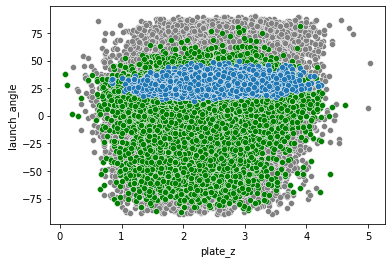

In [9]:
# comparing plate_z (independent) with launch_angle (dependent)
# for outs (grey), hits (green), and home_runs (blue)

sns.scatterplot(data=outs, x='plate_z', y='launch_angle', color='grey')
sns.scatterplot(data=hits, x='plate_z', y='launch_angle', color='green')
sns.scatterplot(data=hrs, x='plate_z', y='launch_angle', color='tab:blue')

<AxesSubplot:xlabel='plate_z', ylabel='launch_angle'>

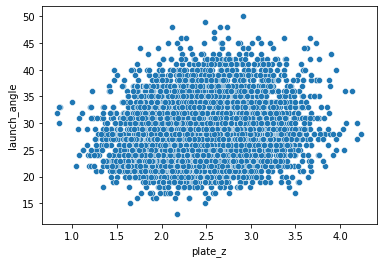

In [10]:
# same scatter plot, but just looking at the home runs by themselves

sns.scatterplot(data=hrs, x='plate_z', y='launch_angle', color='tab:blue')

<strong>Hypothesis: </strong>The launch angle has a positive relationship with the location of the ball crossing the plate in the vertical plane (plate_z).

## 3. Data prep for regression analysis

### 3.1 Check for missing values

In [11]:
hrs['launch_angle'].isnull().value_counts()

False    5933
True       11
Name: launch_angle, dtype: int64

In [12]:
hrs['plate_z'].isnull().value_counts()

False    5935
True        9
Name: plate_z, dtype: int64

In [13]:
hrs2 = hrs[hrs['launch_angle'].isnull() == False]
hrs2.shape

(5933, 57)

In [14]:
hrs2['plate_z'].isnull().value_counts()

False    5933
Name: plate_z, dtype: int64

### 3.2 Reshape variables & split into test/train sets

In [15]:
# define and reshape variables into numpy arrays

X = hrs2['plate_z'].values.reshape(-1,1)
y = hrs2['launch_angle'].values.reshape(-1,1)

In [16]:
print(X.shape)
print(y.shape)

(5933, 1)
(5933, 1)


In [17]:
# using the scikit-learn train_test_split function, divide the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
# check to see how many records were included in the training set (should be 70% of 5933, which is 4153.1)

X_train.shape

(4153, 1)

## 4. Regression analysis

### 4.1 Train the model

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

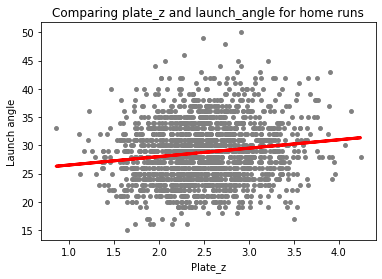

In [32]:
# Plot that shows the regression line on top of the test data
# using either seaborn or matplotlib


#sns.scatterplot(x=X_test.flatten(), y=y_test.flatten())
#sns.lineplot(x=X_test.flatten(), y=y_predicted.flatten(), color='red', linewidth=3)

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)

plt.title('Comparing plate_z and launch_angle for home runs')
plt.xlabel('Plate_z')
plt.ylabel('Launch angle')
plt.show()

### 4.2 Calculate how well it fits

In [23]:
# calculate root mean squared error and R2 values for how well the regression line fits the test data

rmse = mean_squared_error(y_test, y_predicted) # mean squared error

r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.49279517]]
Mean squared error:  27.51956762552338
R2 score:  0.015788582529771555


In [76]:
# Create a dataframe comparing the actual and predicted values of y.
# the two columns don't match very well...

data = pd.DataFrame({'y_test': y_test.flatten(), 'y_predicted': y_predicted.flatten(), 'X_test': X_test.flatten()})
data

,y_test,y_predicted,X_test
0,28.0,28.606938,2.41
1,32.0,28.188955,2.13
2,22.0,29.562327,3.05
3,32.0,28.069531,2.05
4,27.0,29.278695,2.86
...,...,...,...
1775,32.0,30.278868,3.53
1776,35.0,27.442557,1.63
1777,33.0,29.278695,2.86
1778,34.0,29.353335,2.91


<AxesSubplot:xlabel='y_test', ylabel='y_predicted'>

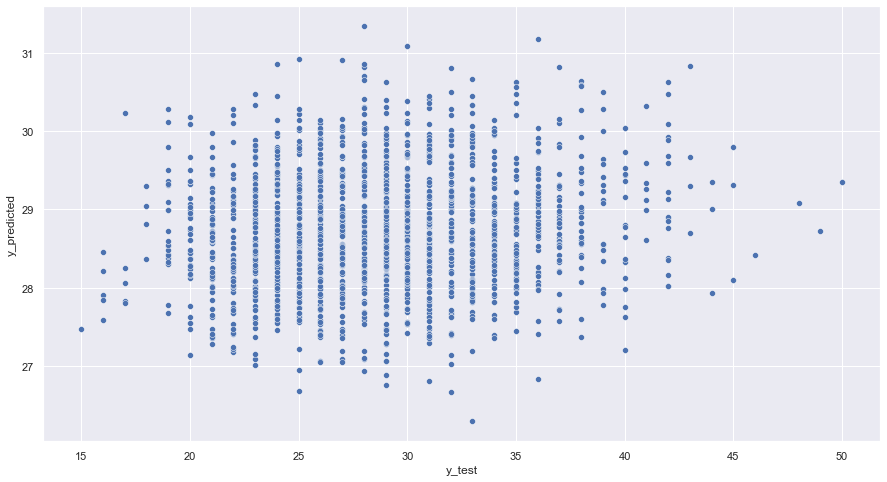

In [75]:
sns.scatterplot(data=data, x='y_test', y='y_predicted')

In [42]:
a = data.index.values.reshape(-1,1)
a.shape

(1780, 1)

### 4.3 Compare how the model fits the training set

In [26]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting using the original X_train data.

In [27]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.49279517]]
Mean squared error:  26.73516356506172
R2 score:  0.019732538876022554


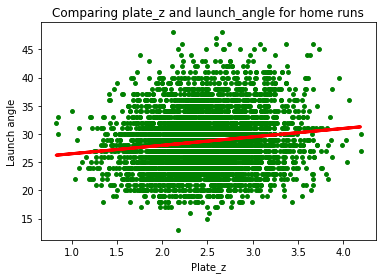

In [31]:
# Visualizing the training set results.

plt.scatter(X_train, y_train, color='green', s = 15)
plt.plot(X_train, y_predicted_train, color='red', linewidth =3)

plt.title('Comparing plate_z and launch_angle for home runs')
plt.xlabel('Plate_z')
plt.ylabel('Launch angle')
plt.show()

## 5. Observations

From the initial scatter plot, it didn't look like there was going to be a linear relationship, but it was impossible to tell the density of the points in the middle. Theoretically I thought there might have been a relationship between the height of the ball (plate_z) and the launch angle of the ball off the bat. But as I revisit my knowledge of hitting and the bodily rotation used to swing the bat to make contact with the ball, it does also make sense that the same launch angle can be achieved at different heights of the ball. What also isn't taken into consideration with this assessment is the batter's height. The plate_z with regards to a tall batter will be completely different for a shorter batter. Ultimately, this analysis doesn't yield any positive information, but I know that there is NOT a linear relationship between launch_angle and plate_z for home runs.